In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


from scipy import io
import os

# rcParams.update({'font.size': 18})
# plt.rcParams['figure.figsize'] = [12, 12]

Using TensorFlow backend.


In [2]:
# ## Simulate the Lorenz System

# dt = 0.01
# T = 8
# t = np.arange(0,T+dt,dt)
# beta = 8/3
# sigma = 10
# rho_list = [28]#[10, 28, 40]


# nn_input = np.zeros((100*(len(t)-1)*len(rho_list),4))
# nn_output = np.zeros((100*(len(t)-1)*len(rho_list),3))
# print(nn_input.shape)
# print(nn_output.shape)

# fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


# for i in range(len(rho_list)):
#     rho = rho_list[i]
    
#     def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
#         x, y, z = x_y_z
#         return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# #     np.random.seed(123)
#     x0 = -15 + 30 * np.random.random((100, 3))

#     x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
#                       for x0_j in x0])

#     print("i = ", i)
#     for j in range(100):
#         add_factor = i*100*(len(t)-1)
#         nn_input[(j*(len(t)-1)+add_factor):(j+1)*(len(t)-1)+add_factor,:-1] = x_t[j,:-1,:]
#         nn_output[(j*(len(t)-1)+add_factor):(j+1)*(len(t)-1)+add_factor,:] = x_t[j,1:,:]
#         nn_input[(j*(len(t)-1)+add_factor):(j+1)*(len(t)-1)+add_factor,-1] = rho 
#         x, y, z = x_t[j,:,:].T
#         ax.plot(x, y, z,linewidth=1)
#         ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
    
# # nn_input = nn_input.T
# # nn_output = nn_output.T
             
# ax.view_init(18, -113)
# plt.show()

# print(nn_input.shape)
# print(nn_output.shape)

(800, 4)
(2400, 4)
(2400, 3)


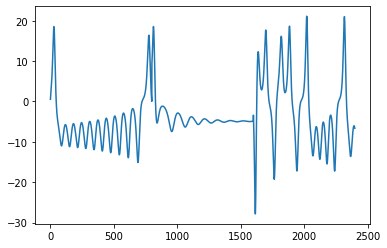

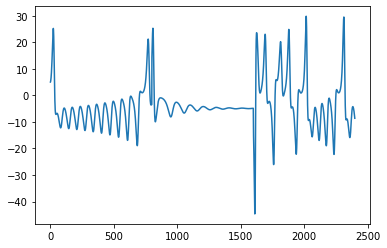

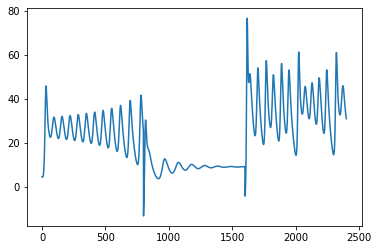

(2400, 4)
(2400, 3)


In [98]:
data_w_mat = io.loadmat(os.path.join('Lorenz28.mat'))

y = data_w_mat['y_rho']
nn_input = y[:-1]
nn_output = y[1:, :-1]
print(nn_input.shape)

data_w_mat = io.loadmat(os.path.join('Lorenz10.mat'))

y = data_w_mat['y_rho']
nn_input = np.append(nn_input, y[:-1], axis = 0)
nn_output = np.append(nn_output, y[1:, :-1], axis = 0)

data_w_mat = io.loadmat(os.path.join('Lorenz40.mat'))

y = data_w_mat['y_rho']
nn_input = np.append(nn_input, y[:-1], axis = 0)
nn_output = np.append(nn_output, y[1:, :-1], axis = 0)

print(nn_input.shape)
print(nn_output.shape)
plt.plot(nn_input[:,0])
plt.show()
plt.plot(nn_input[:, 1])
plt.show()
plt.plot(nn_input[:,2])
plt.show()
print(nn_input.shape)
print(nn_output.shape)

In [5]:
# j = 0
# i = 1
# print(j*(len(t)-1)+i*100*(len(t)-1))
# print((j+1)*(len(t)-1)+i*100*(len(t)-1))
# plt.plot(nn_input[:,-1])

NameError: name 't' is not defined

In [35]:
print(nn_input.shape)
# N, inputs= nn_input.shape

(2400, 4)


In [99]:
## Neural Net

# Define activation functions
def logsig(x):
    return K.variable(np.divide(1,(1+np.exp(-K.eval(x)))))

def radbas(x):
    return K.variable(np.exp(-np.power(K.eval(x),2)))

def purelin(x):
    return x


#create model
model = Sequential()

# #add model layers
# model.add(Dense(10, activation=logsig))
# model.add(Dense(10, activation=radbas))
# model.add(Dense(10, activation=purelin))

# model = Sequential()
model.add(Dense(100, activation='sigmoid',  input_shape = (4,)))
# model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='linear'))
model.add(Dense(3))

# model.add(Dense(100, activation='sigmoid',  input_shape = (3,)))
# model.add(Dense(100, activation='linear'))
# model.add(Dense(200, activation='sigmoid'))
# model.add(Dense(100, activation='linear'))
# model.add(Dense(3))

# model.add(Dense(10, activation='sigmoid',  input_shape = (4,)))
# # model.add(Dense(10, activation=radbas))
# model.add(Dense(10, activation='linear'))
# # model.add(Dense(10, activation='tanh'))
# model.add(Dense(3))

# model = Sequential([
#     layers.Dense(100, activation='linear') input_shape = (4,)),
#     layers.Dense(100, activation='sigmoid'),
#     layers.Dense(100, activation='tanh'),
#     layers.Dense(3),
# ])




# sgd_optimizer = optimizers.SGD(momentum=0.9)
# model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
# model.fit(nn_input, nn_output, epochs=30)

# sgd_optimizer = optimizers.SGD(momentum=0.9)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mean_squared_error')
history = model.fit(nn_input, nn_output, epochs=300, validation_split=0.2)

Train on 1920 samples, validate on 480 samples
Epoch 1/300
1920/1920 [==============================] - 1s 307us/step - loss: 91.8273 - val_loss: 118.8520
Epoch 2/300
1920/1920 [==============================] - 0s 69us/step - loss: 22.5574 - val_loss: 30.4047
Epoch 3/300
1920/1920 [==============================] - 0s 61us/step - loss: 9.4941 - val_loss: 21.7526
Epoch 4/300
1920/1920 [==============================] - 0s 53us/step - loss: 6.7489 - val_loss: 17.7165
Epoch 5/300
1920/1920 [==============================] - 0s 53us/step - loss: 4.7339 - val_loss: 22.3797
Epoch 6/300
1920/1920 [==============================] - 0s 52us/step - loss: 3.0070 - val_loss: 21.7543
Epoch 7/300
1920/1920 [==============================] - 0s 51us/step - loss: 2.0056 - val_loss: 11.0941
Epoch 8/300
1920/1920 [==============================] - 0s 49us/step - loss: 1.5006 - val_loss: 13.4495
Epoch 9/300
1920/1920 [==============================] - 0s 54us/step - loss: 1.1556 - val_loss: 10.6487
Epoc

1920/1920 [==============================] - 0s 50us/step - loss: 0.0347 - val_loss: 0.3080
Epoch 79/300
1920/1920 [==============================] - 0s 55us/step - loss: 0.0188 - val_loss: 0.2913
Epoch 80/300
1920/1920 [==============================] - 0s 47us/step - loss: 0.0744 - val_loss: 0.3375
Epoch 81/300
1920/1920 [==============================] - 0s 52us/step - loss: 0.0536 - val_loss: 0.3310
Epoch 82/300
1920/1920 [==============================] - 0s 52us/step - loss: 0.0627 - val_loss: 0.3220
Epoch 83/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0332 - val_loss: 0.2093
Epoch 84/300
1920/1920 [==============================] - 0s 54us/step - loss: 0.0597 - val_loss: 0.2461
Epoch 85/300
1920/1920 [==============================] - 0s 48us/step - loss: 0.0281 - val_loss: 0.2410
Epoch 86/300
1920/1920 [==============================] - 0s 52us/step - loss: 0.0134 - val_loss: 0.2808
Epoch 87/300
1920/1920 [==============================] - 0s 52us/st

Epoch 155/300
1920/1920 [==============================] - 0s 46us/step - loss: 0.0383 - val_loss: 0.1301
Epoch 156/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0218 - val_loss: 0.1768
Epoch 157/300
1920/1920 [==============================] - 0s 47us/step - loss: 0.0157 - val_loss: 0.1713
Epoch 158/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0276 - val_loss: 0.2159
Epoch 159/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0830 - val_loss: 0.2278
Epoch 160/300
1920/1920 [==============================] - 0s 50us/step - loss: 0.1496 - val_loss: 0.2759
Epoch 161/300
1920/1920 [==============================] - 0s 50us/step - loss: 0.0443 - val_loss: 0.2224
Epoch 162/300
1920/1920 [==============================] - 0s 50us/step - loss: 0.0215 - val_loss: 0.1906
Epoch 163/300
1920/1920 [==============================] - 0s 47us/step - loss: 0.0079 - val_loss: 0.1190
Epoch 164/300
1920/1920 [=====================

Epoch 231/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0070 - val_loss: 0.1118
Epoch 232/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0114 - val_loss: 0.1498
Epoch 233/300
1920/1920 [==============================] - 0s 48us/step - loss: 0.0255 - val_loss: 0.1723
Epoch 234/300
1920/1920 [==============================] - 0s 51us/step - loss: 0.0932 - val_loss: 0.7395
Epoch 235/300
1920/1920 [==============================] - 0s 50us/step - loss: 0.0935 - val_loss: 0.2550
Epoch 236/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0175 - val_loss: 0.1042
Epoch 237/300
1920/1920 [==============================] - 0s 47us/step - loss: 0.0128 - val_loss: 0.1444
Epoch 238/300
1920/1920 [==============================] - 0s 51us/step - loss: 0.0081 - val_loss: 0.1236
Epoch 239/300
1920/1920 [==============================] - 0s 49us/step - loss: 0.0068 - val_loss: 0.1349
Epoch 240/300
1920/1920 [=====================

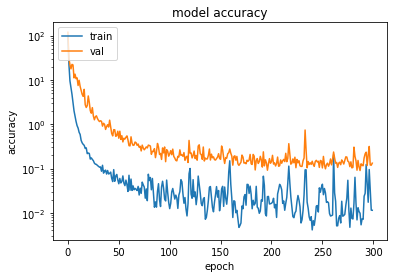

In [100]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [101]:
# print(T)
predicted = np.zeros((800, 3))#(100*(len(t)-1),3))
rho = nn_input[0,-1]
predicted[0] = nn_input[0, :-1]
# call = np.reshape(nn_input[0], (1,4))
# print(nn_input[0])
# print(nn_input.shape)
# print(call)
# print(model.predict(call))
# print(model.predict(np.array([np.append(nn_input[0, :-1])])))
for k in range(800-1):#len(nn_input)-1):
#     print(np.append(np.array([predicted[k]]), rho))
    predicted[k+1] = model.predict(np.array([np.append(predicted[k], rho)]))
#     predicted[k+1] = model.predict(np.array([predicted[k]]))

    #model.predict(np.append(np.array([predicted[k]]), rho))

[0.53520281 5.03837307 4.43487075]
[0.96908627 5.16562346 4.35619895]


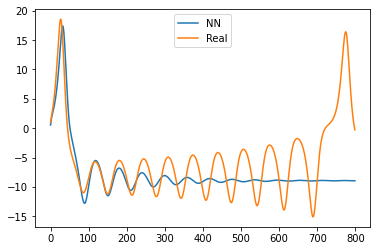

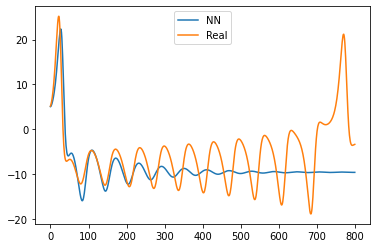

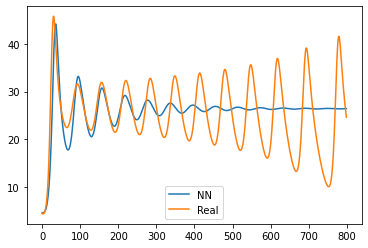

In [102]:
# predicted = model.predict(nn_input)

print(predicted[0])
print(nn_output[0])
plt.plot(predicted[:800,0])
plt.plot(nn_output[:800, 0])
plt.legend(["NN", "Real"])
plt.show()
plt.plot(predicted[:800,1])
plt.plot(nn_output[:800, 1])
plt.legend(["NN", "Real"])

plt.show()
plt.plot(predicted[:800,2])
plt.plot(nn_output[:800, 2])
plt.legend(["NN", "Real"])

plt.show()

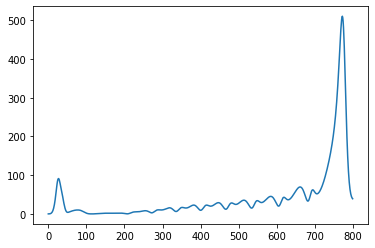

In [105]:
mse = ((nn_output[:800] - predicted)**2).mean(axis=1)
# print(mse)
plt.plot(mse)
# plt.ylim([0,50])
plt.show()

In [106]:
data_w_mat = io.loadmat(os.path.join('Lorenz17.mat'))

y = data_w_mat['y_rho']
test_input17 = y[:-1]
test_output17 = y[1:,:-1]
# nn_input = y[:-1]
# nn_output = y[1:, :-1]
print(test_input17.shape)

data_w_mat = io.loadmat(os.path.join('Lorenz35.mat'))

y = data_w_mat['y_rho']
test_input35 = y[:-1]
test_output35 = y[1:,:-1]


(800, 4)


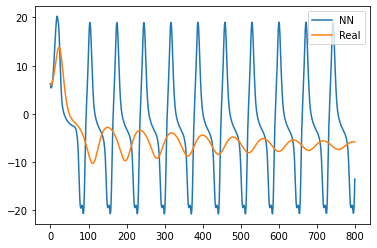

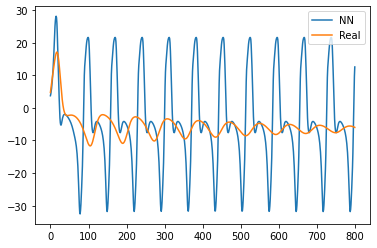

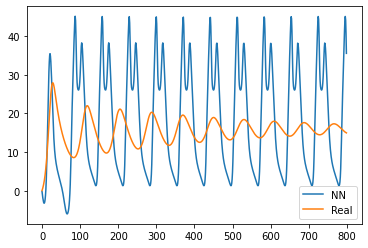

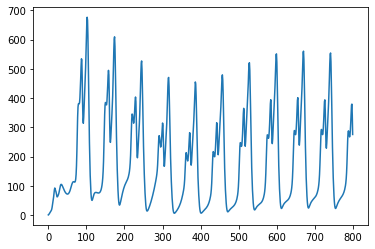

In [107]:

predicted17 = np.zeros(test_output17.shape)
rho = test_input17[0,-1]
predicted17[0] = test_input17[0, :-1]
for k in range(800-1):
    predicted17[k+1] = model.predict(np.array([np.append(predicted17[k], rho)]))
# print(predicted[0])
# print(nn_output[0])
plt.plot(predicted17[:800,0])
plt.plot(test_output17[:800, 0])
plt.legend(["NN", "Real"])
plt.show()
plt.plot(predicted17[:800,1])
plt.plot(test_output17[:800, 1])
plt.legend(["NN", "Real"])

plt.show()
plt.plot(predicted17[:800,2])
plt.plot(test_output17[:800, 2])
plt.legend(["NN", "Real"])

plt.show()

mse = ((test_output17 - predicted17)**2).mean(axis=1)
# print(mse)
plt.plot(mse)
# plt.ylim([0,50])
plt.show()

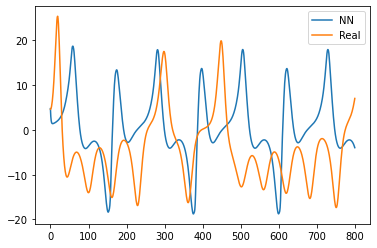

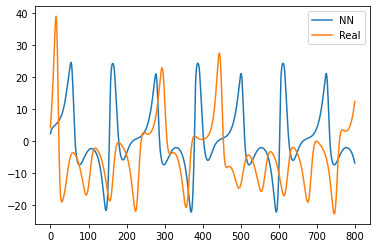

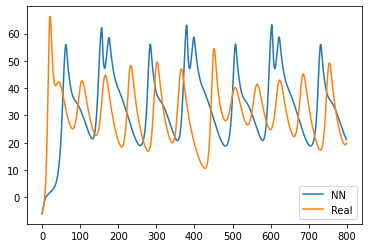

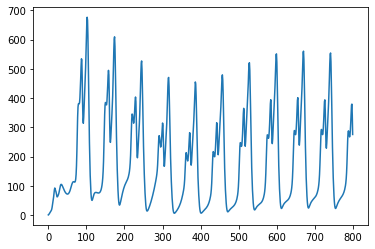

In [108]:

predicted35 = np.zeros(test_output17.shape)
rho = test_input35[0,-1]
predicted35[0] = test_input35[0, :-1]
for k in range(800-1):
    predicted35[k+1] = model.predict(np.array([np.append(predicted35[k], rho)]))
# print(predicted[0])
# print(nn_output[0])
plt.plot(predicted35[:800,0])
plt.plot(test_output35[:800, 0])
plt.legend(["NN", "Real"])
plt.show()
plt.plot(predicted35[:800,1])
plt.plot(test_output35[:800, 1])
plt.legend(["NN", "Real"])

plt.show()
plt.plot(predicted35[:800,2])
plt.plot(test_output35[:800, 2])
plt.legend(["NN", "Real"])

plt.show()

mse = ((test_output17 - predicted17)**2).mean(axis=1)
# print(mse)
plt.plot(mse)
# plt.ylim([0,50])
plt.show()